In [1]:
# Ejemplo utilizando el contexto para identificar digitos escritos a mano

In [2]:
import numpy as np

#lo usaremos solo para descargar la base de datos MINIST sin complicaciones
from tensorflow import keras

#+++
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [3]:
# Cargando base de datos MINIST
mnist = keras.datasets.mnist

# cargamos los conjutnos de entrenamiento y prueba 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

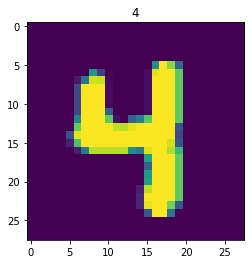

In [11]:
"verificamos que tiene X_train"

i = 58
plt.imshow(X_train[i])
plt.title(str(y_train[i]))
plt.show()

In [9]:
y_train[0]

5

In [42]:
# "Aplanamos estas imágenes con reshape de numpy"

# X_train is 60,000 rows of 28 x 28 values --> Reshaped in 60,000 x 784
alto = X_train[0].shape[0]
ancho = X_train[0].shape[1]
RESHAPED = alto*ancho
X_train = X_train.reshape(len(X_train), RESHAPED)
X_test = X_test.reshape(len(X_test), RESHAPED)

In [33]:
from sklearn.exceptions import ConvergenceWarning


mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=100, alpha=1e-4,
                    solver='sgd', activation='logistic', verbose=10, random_state=1,batch_size=len(X_train),
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)




Iteration 1, loss = 2.41270285
Iteration 2, loss = 2.06332345
Iteration 3, loss = 1.82593012
Iteration 4, loss = 1.65555998
Iteration 5, loss = 1.48708311
Iteration 6, loss = 1.35934150
Iteration 7, loss = 1.24829612
Iteration 8, loss = 1.15384112
Iteration 9, loss = 1.07171395
Iteration 10, loss = 0.99561203
Iteration 11, loss = 0.92527929
Iteration 12, loss = 0.86100115
Iteration 13, loss = 0.80270534
Iteration 14, loss = 0.75074236
Iteration 15, loss = 0.70428218
Iteration 16, loss = 0.66237577
Iteration 17, loss = 0.62550854
Iteration 18, loss = 0.59261293
Iteration 19, loss = 0.56362518
Iteration 20, loss = 0.53835057
Iteration 21, loss = 0.51544170
Iteration 22, loss = 0.49472978
Iteration 23, loss = 0.47657251
Iteration 24, loss = 0.45987571
Iteration 25, loss = 0.44535403
Iteration 26, loss = 0.43206741
Iteration 27, loss = 0.41936286
Iteration 28, loss = 0.40794746
Iteration 29, loss = 0.39786134
Iteration 30, loss = 0.38876121
Iteration 31, loss = 0.38032705
Iteration 32, los

/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=60000, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [34]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.939200
Test set score: 0.925300


Confusion matrix:
[[ 955    0    1    1    0   10    7    2    3    1]
 [   0 1110    3    6    0    0    4    3    9    0]
 [  11    0  939   10   16    1   13   14   26    2]
 [   0    0   16  938    0   19    3   15   14    5]
 [   1    2    4    0  917    1   11    2    5   39]
 [  11    2    7   49    7  760   10    5   35    6]
 [  13    3    7    1   12   12  906    0    4    0]
 [   3   10   22    7    6    1    0  953    2   24]
 [   5    5    8   22    8   27   11   15  867    6]
 [  12    4    1   13   37    7    2   17    8  908]]


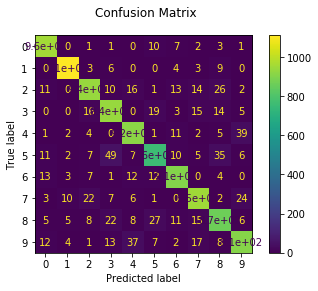

In [37]:
disp = metrics.plot_confusion_matrix(mlp, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [7]:
# MNIST dataset is read as integer numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# Normalization to [0, 1] (Max value for grayscale images is 255)
X_train /= 255
X_test /= 255

In [9]:
# Verify train and test datasets
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [10]:
# Convert class vectors to OHE representation
Y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
Y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

In [11]:
# Create model
model = keras.models.Sequential()

In [12]:
# 784 inputs and N_HIDDEN neurons in the first hidden layer
model.add(keras.layers.Dense(N_HIDDEN,
          input_shape=(RESHAPED,),
          name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))

# N_HIDDEN neurons in the second hidden layer
model.add(keras.layers.Dense(N_HIDDEN,
          name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))

# 10 outputs
model.add(keras.layers.Dense(NB_CLASSES,
          name='dense_layer_3', activation='softmax'))

In [13]:
# Show network architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

In [15]:
# Training
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5105 - accuracy: 0.8455 - val_loss: 0.1896 - val_accuracy: 0.9448
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2346 - accuracy: 0.9311 - val_loss: 0.1346 - val_accuracy: 0.9603
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1731 - accuracy: 0.9476 - val_loss: 0.1136 - val_accuracy: 0.9667
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1465 - accuracy: 0.9556 - val_loss: 0.1006 - val_accuracy: 0.9697
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1274 - accuracy: 0.9605 - val_loss: 0.0949 - val_accuracy: 0.9710
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1131 - accuracy: 0.9651 - val_loss: 0.0902 - val_accuracy: 0.9737
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1038 - accuracy: 0.9677 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 

In [16]:
# Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9800

Test score: 0.07259491831064224
Test accuracy: 0.9800000190734863


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


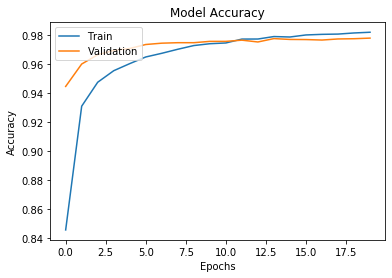

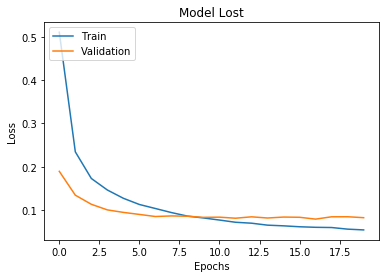

In [17]:
#<<<
# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Lost')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#>>>

In [ ]:
REFERENCIAS

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html